In [2]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [3]:
# define global figure properties
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14,             # font size
                     'axes.titlelocation':'left',# title location
                     'axes.spines.right':False,  # remove axis bounding box
                     'axes.spines.top':False,    # remove axis bounding box
                     })

I use generic variable names numbered with the exercise number.

## Exercise 1

In [4]:
# Creating a 1-D vector

data_arr = np.array([x for x in range(0, 12)])
data_arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [5]:
# Reshaping the array

data_1 = data_arr.reshape(4, 3)
data_1

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [6]:
df_1 = pd.DataFrame(data_1, columns=['A', 'B', 'C'])
df_1

,A,B,C
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11


/tmp/ipykernel_7333/265838381.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_1.index)


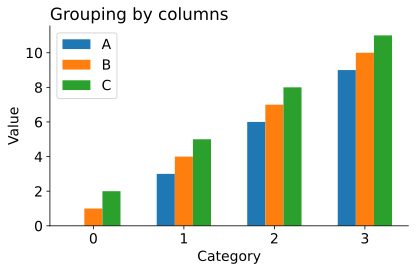

In [23]:
# First plot (Fig 3.26 (B))

fig, ax = plt.subplots(figsize=(6, 4))

# Setting bar width
width = 0.20
multiplier = 0

# Plotting all the columns
for col in df_1.columns:
    offset = width * multiplier
    ax.bar(df_1.index + offset, df_1[col], width, label=col)
    multiplier += 1

# Setting labels and titles
ax.set_xlabel('Category')
ax.set_ylabel('Value')
ax.set_title('Grouping by columns')

# Customizing x-ticks
ax.set_xticklabels(df_1.index)
ax.set_xticks(df_1.index+width)

# Legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show();

In [24]:
# Transposing the DataFrame

new_df_1 = df_1.T
new_df_1

,0,1,2,3
A,0,3,6,9
B,1,4,7,10
C,2,5,8,11


/tmp/ipykernel_7333/2739704960.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(new_df_1.index)


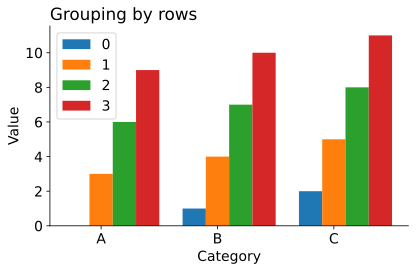

In [25]:
# Second plot (Fig 3.26 (C))

fig, ax = plt.subplots(figsize=(6, 4))

# Setting bar width
width = 0.20
multiplier = 0

# Need to convert new_df index in numerical form to shift each column by the offset.
x = np.arange(len(new_df_1.index))

# Plotting all the columns
for col in new_df_1.columns:
    offset = width * multiplier
    ax.bar(x+offset, new_df_1[col], width, label=col)
    multiplier += 1

# Setting labels and titles
ax.set_xlabel('Category')
ax.set_ylabel('Value')
ax.set_title('Grouping by rows')

# Customizing x-ticks
ax.set_xticklabels(new_df_1.index)
ax.set_xticks(x+width)

# Legend
ax.legend()

# display the figure
plt.tight_layout()
plt.show();

Exercise Completed.

## Exercise 2

In [26]:
# List of Columns

cols = [x for x in range(1,7)]
cols

[1, 2, 3, 4, 5, 6]

In [27]:
# Corresponding means

means = [(x + 1) **2 for x in cols]
means

[4, 9, 16, 25, 36, 49]

In [28]:
# Corresponding standard deviations

stds = [30*((2*x / 5) - 1)**2 for x in cols]
stds

[10.799999999999999,
 1.1999999999999993,
 1.1999999999999993,
 10.800000000000002,
 30.0,
 58.79999999999999]

In [29]:
# Empty DataFrame

df_2 = pd.DataFrame()
df_2

""


In [30]:
# Adding values to the Dataframe

for i in range(0,6):
    df_2[cols[i]] = np.random.normal(means[i], stds[i], 30)

In [31]:
# Checking dataframe

df_2.head()

,1,2,3,4,5,6
0,20.359562,9.123244,17.026454,31.812019,84.032246,24.090465
1,10.556770,7.051973,18.610902,25.202880,82.600603,141.247077
2,17.146392,9.927629,16.988884,10.079647,30.850723,27.136431
3,-7.524242,9.433483,13.193986,15.383512,-9.142590,3.980507
4,-9.591621,8.805687,18.124824,30.999258,7.115062,40.110919


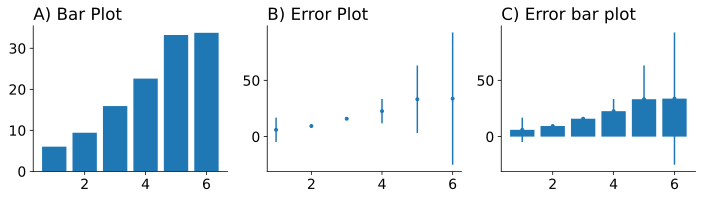

In [32]:
# Plotting

# Creating 3 figures in one row
fig, ax = plt.subplots(1, 3, figsize=(10,3))

# A plot
ax[0].bar(x=cols, height=[df_2[col].mean() for col in cols])
ax[0].set_title('A) Bar Plot')

# B plot
ax[1].errorbar(x=cols, y=[df_2[col].mean() for col in cols], yerr=stds, marker='.', linestyle='')
ax[1].set_title('B) Error Plot')

# C plot
ax[2].bar(x=cols, height=[df_2[col].mean() for col in cols])
ax[2].errorbar(x=cols, y=[df_2[col].mean() for col in cols], yerr=stds, marker='.', linestyle='')
ax[2].set_title('C) Error bar plot')

# display the plot
plt.tight_layout()
plt.show();

Exercise Completed.

## Exercise 3

In [33]:
# Data dict

d = {
    'Chocolate': 24,
     'Vanilla' : 16,
  'Strawberry' :  7,
   'Pistachio' : 16
   }

In [34]:
data_3 = pd.Series(d, index=d.keys())
data_3

Chocolate     24
Vanilla       16
Strawberry     7
Pistachio     16
dtype: int64

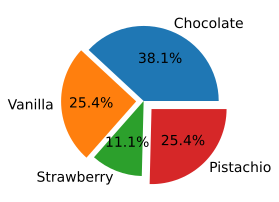

In [35]:
# Plot

fig, ax = plt.subplots(figsize=(4,4))

ax.pie(data_3, labels=data_3.index, autopct="%1.1f%%", explode=[0, 0.1, 0, 0.15]);

plt.tight_layout()
plt.show()

Exercise Completed.

## Exercise 4

In [36]:
# Creating the data

data_4 = np.random.gamma(shape=1, scale=1, size=500)
data_4[:10]

array([1.66694386, 0.38165696, 0.88124636, 1.1438881 , 0.52534271,
       0.1913797 , 0.12379276, 0.21790336, 0.79707189, 0.1833433 ])

In [37]:
# Binning the data

y_4, x_4 = np.histogram(data_4, bins=40)
x_4 = (x_4[:-1] + x_4[1:]) /2

# Normalize the values

yp_4 = y_4*100 / np.sum(y_4)

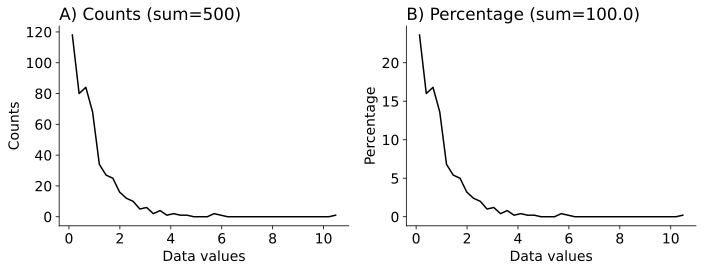

In [38]:
# Plot

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot A
axs[0].plot(x_4, y_4, color='black')
axs[0].set_title(f'A) Counts (sum={np.sum(y_4)})')
axs[0].set_xlabel('Data values')
axs[0].set_ylabel('Counts')

# Plot B
axs[1].plot(x_4, yp_4, color='black')
axs[1].set_title(f'B) Percentage (sum={np.sum(yp_4)})')
axs[1].set_xlabel('Data values')
axs[1].set_ylabel('Percentage')

# Display the plots
plt.tight_layout()
plt.show();

Exercise Completed

## Exercise 5

In [39]:
# Parameters

N_5 = 200 # sample sizes
k_5 = 30 # number of bins

In [40]:
# Create the data

normal_5 = np.random.normal(2, 1, N_5)
exponential_5 = np.exp(np.random.normal(0,1, N_5))

In [41]:
# Define the bins

alldata = np.hstack((normal_5, exponential_5))
bins = np.linspace(np.min(alldata), np.max(alldata), k_5+1)
bins 

array([-0.59284207,  0.3138355 ,  1.22051307,  2.12719063,  3.0338682 ,
        3.94054577,  4.84722334,  5.75390091,  6.66057848,  7.56725605,
        8.47393361,  9.38061118, 10.28728875, 11.19396632, 12.10064389,
       13.00732146, 13.91399902, 14.82067659, 15.72735416, 16.63403173,
       17.5407093 , 18.44738687, 19.35406443, 20.260742  , 21.16741957,
       22.07409714, 22.98077471, 23.88745228, 24.79412984, 25.70080741,
       26.60748498])

In [42]:
# Get histogram values

y1_5, x1_5 = np.histogram(normal_5, bins=bins)
y2_5, x2_5 = np.histogram(exponential_5, bins=bins)

# Bin midpoints

xx_5 = (x1_5[:-1]+x1_5[1:]) / 2 

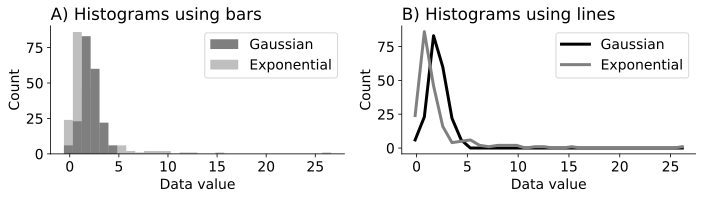

In [43]:
# Plot

fig, axs = plt.subplots(1, 2, figsize=(10,3))

# Draw the histograms using matplotlib
axs[0].hist(normal_5, bins=bins, label='Gaussian', alpha=0.5, color='black')
axs[0].hist(exponential_5, bins=bins, label='Exponential', alpha=0.5, color='gray')
axs[0].set_title('A) Histograms using bars')

# Line plot
axs[1].plot(xx_5, y1_5, linewidth=3, label='Gaussian', color='black')
axs[1].plot(xx_5, y2_5, linewidth=3, label='Exponential', color='gray')
axs[1].set_title('B) Histograms using lines')

for a in axs:
    a.set_xlabel('Data value')
    a.set_ylabel('Count')
    a.legend()

# Display the plots
plt.tight_layout()
plt.show();

In [45]:
# Changing the parameters 

# Parameters

N_5 = 200 # sample sizes
k_5 = 30 # number of bins


# Create the data

normal_5 = np.random.normal(2, 1, N_5)
exponential_5 = np.exp(np.random.normal(0,1, N_5))


# Define the bins

alldata = np.hstack((normal_5, exponential_5))
bins = np.linspace(np.min(alldata), np.max(alldata), k_5+1)


# Get histogram values

y1_5, x1_5 = np.histogram(normal_5, bins=bins)
y2_5, x2_5 = np.histogram(exponential_5, bins=bins)

# Bin midpoints

xx_5 = (x1_5[:-1]+x1_5[1:]) / 2 

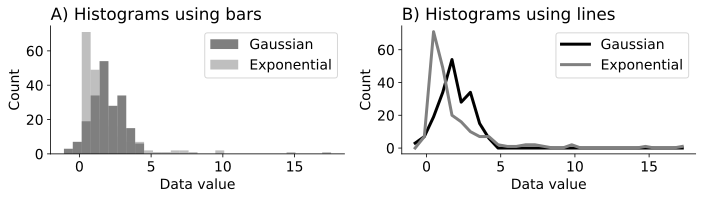

In [46]:
# Plot

fig, axs = plt.subplots(1, 2, figsize=(10,3))

# Draw the histograms using matplotlib
axs[0].hist(normal_5, bins=bins, label='Gaussian', alpha=0.5, color='black')
axs[0].hist(exponential_5, bins=bins, label='Exponential', alpha=0.5, color='gray')
axs[0].set_title('A) Histograms using bars')

# Line plot
axs[1].plot(xx_5, y1_5, linewidth=3, label='Gaussian', color='black')
axs[1].plot(xx_5, y2_5, linewidth=3, label='Exponential', color='gray')
axs[1].set_title('B) Histograms using lines')

for a in axs:
    a.set_xlabel('Data value')
    a.set_ylabel('Count')
    a.legend()

# Display the plots
plt.tight_layout()
plt.show();

For a small sample size, the histogram is more interpretable. But for a big sample size, the line plots are more interpretable.

Exercise completed.

## Exercise 6

In [47]:
x1_6 = np.linspace(0, 6, 1001)
y1_6 = x1_6 / 2

y1_e_6 = np.exp(x1_6)

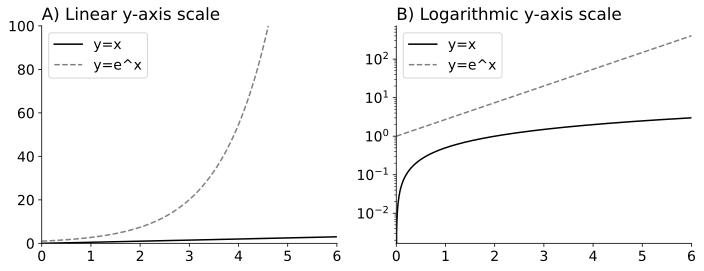

In [48]:
# Plot

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# First plot
axs[0].plot(x1_6, y1_6, linestyle='-', color='black', label='y=x')
axs[0].plot(x1_6, y1_e_6, linestyle='--', color='gray', label='y=e^x')
axs[0].set_title('A) Linear y-axis scale')
axs[0].set_xlim([np.min(x1_6), np.max(x1_6)])
axs[0].set_ylim([0, 100])
axs[0].legend()

# Second plot
axs[1].plot(x1_6, y1_6, linestyle='-', color='black', label='y=x')
axs[1].plot(x1_6, y1_e_6, linestyle='--', color='gray', label='y=e^x')
axs[1].set_title('B) Logarithmic y-axis scale')
axs[1].set_xlim([np.min(x1_6), np.max(x1_6)])
axs[1].set_yscale('log')
axs[1].legend()

# Display the plots
plt.tight_layout()
plt.show();

In [49]:
# Using -x instead of x.

x1_6 = np.linspace(0, 6, 1001)
y1_6 = - x1_6 / 2

y1_e_6 = np.exp(x1_6)

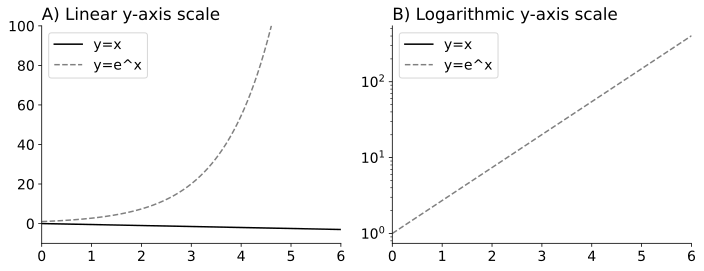

In [50]:
# Plot

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# First plot
axs[0].plot(x1_6, y1_6, linestyle='-', color='black', label='y=x')
axs[0].plot(x1_6, y1_e_6, linestyle='--', color='gray', label='y=e^x')
axs[0].set_title('A) Linear y-axis scale')
axs[0].set_xlim([np.min(x1_6), np.max(x1_6)])
axs[0].set_ylim([-10, 100])
axs[0].legend()

# Second plot
axs[1].plot(x1_6, y1_6, linestyle='-', color='black', label='y=x')
axs[1].plot(x1_6, y1_e_6, linestyle='--', color='gray', label='y=e^x')
axs[1].set_title('B) Logarithmic y-axis scale')
axs[1].set_xlim([np.min(x1_6), np.max(x1_6)])
axs[1].set_yscale('log')
axs[1].legend()

# Display the plots
plt.tight_layout()
plt.show();

So the linear plot is as expected, only the linear line is below zero. but the y=x plot disappears for log plot given that log of a negative number does not exist in real numbers. thus, log y-axis scaling is valid only for positive valued data.

Exercise Completed.

## Exercise 7

In [51]:
normal_series_7 = np.random.normal(0, 1, 123)
uniform_series_7 = np.random.uniform(0, 1, 123)

In [52]:
# Creating the dataframe

df_7 = pd.DataFrame(data={'norm': normal_series_7, 'unif': uniform_series_7})
df_7.head()

,norm,unif
0,0.584417,0.167396
1,0.215842,0.831213
2,-0.453384,0.284130
3,0.506046,0.195416
4,-0.618859,0.501869


/tmp/ipykernel_7333/3148874559.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_7['distr'][:len(df_7)] = 'norm'


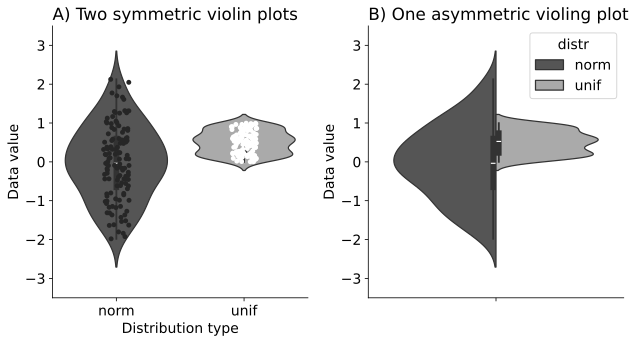

In [53]:
# Plot

fig, axs = plt.subplots(1, 2, figsize=(9, 5))

# Plot A
sns.violinplot(data=df_7, palette='gray', ax=axs[0])
sns.stripplot(data=df_7, ax=axs[0], palette='dark:w')
axs[0].set(xlabel='Distribution type', ylabel='Data value', ylim=[-3.5, 3.5])
axs[0].set_title('A) Two symmetric violin plots')

# combining the data
df_all_7 = pd.DataFrame(pd.concat((df_7['norm'], df_7['unif']), axis=0), columns=['y'])
df_all_7['distr'] = 'unif'
df_all_7['distr'][:len(df_7)] = 'norm'
df_all_7[''] = ' '

# Plot B
sns.violinplot(data=df_all_7, x='', y='y', palette='gray', 
               ax=axs[1], split=True, hue='distr')
axs[1].set(xlim=[-.5, .5], ylabel='Data value', ylim=[-3.5, 3.5])
axs[1].set_title('B) One asymmetric violing plot')

# Display the plots
plt.tight_layout()
plt.show();

The distribution for the uniform dataset is misleading. Uniform distributions have hard boundaries, and yet the violin plot implies a smooth decay to values below zero and above one. This is inaccurate and due to interpolation.

Exercise Completed.

## Exercise 8

In [54]:
months_8 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
temp_8 = [ 26,25,23,19,15,11,11,13,16,19,22,25 ]

data_8 = pd.DataFrame({'temp': temp_8, 'month': months_8})
data_8

,temp,month
0,26,Jan
1,25,Feb
2,23,Mar
3,19,Apr
4,15,May
5,11,Jun
6,11,Jul
7,13,Aug
8,16,Sep
9,19,Oct


In [55]:
fig = px.line_polar(data_8, r='temp', theta='month', line_close=True)

plt.tight_layout()
fig.show()

<Figure size 640x480 with 0 Axes>

Exercise Completed!